In [1]:

from skyfield import almanac
from skyfield.api import Topos,load
from skyfield import api
from skyfield.api import GREGORIAN_START
import matplotlib.pyplot as plt
import numpy as np


In [2]:
long=102.7722
lat=2.1492 
elevation=0
year = 2023
month = 6
day = 18
Timezone = +8


In [3]:
location = Topos(latitude_degrees=lat, longitude_degrees=long,elevation_m=elevation)
print(location)


IERS2010 latitude +2.1492 N longitude 102.7722 E elevation 0.0 m


In [4]:

#skyfield variable
planets = load('de421.bsp')
earth = planets['earth']
sun = planets['sun']
moon = planets['moon']

ts = load.timescale()
eph = api.load('de421.bsp')

In [5]:
t0 = ts.utc(year, month, day-Timezone/24)
t1 = ts.utc(year, month, day+1-Timezone/24)
f = almanac.risings_and_settings(eph, eph['Sun'], location)
t, y = almanac.find_discrete(t0, t1, f)


z = False


for ti, yi in zip(t, y):
    if yi == z:
        hsunset = ti.utc.hour
        msunset = ti.utc.minute
        str_sunset = str(hsunset+Timezone)+":"+str(msunset)


print(str_sunset)

19:16


In [6]:
ts.julian_calendar_cutoff = GREGORIAN_START
location = Topos(latitude_degrees=lat, longitude_degrees=long,elevation_m=elevation)
t0 = ts.utc(year, month, day-Timezone/24)
t1 = ts.utc(year, month, day+1-Timezone/24)
f = almanac.risings_and_settings(eph, eph['Moon'], location)
t, y = almanac.find_discrete(t0, t1, f)


z = False


for ti, yi in zip(t, y):
    if yi == z:
        hmoonset = ti.utc.hour
        mmoonset = ti.utc.minute
        str_moonset = str(hmoonset+Timezone)+":"+str(mmoonset)






print(str_moonset)

19:27


In [7]:
from tabulate import tabulate


data = [["Masa Matahari Terbenam", str_sunset],
        ["Masa bulan Terbenam", str_moonset],
         ]


col_names = ["Data Bulan-Matahari", "Nilai"]


data_table=(tabulate(data, headers=col_names))
print(data_table)


Data Bulan-Matahari     Nilai
----------------------  -------
Masa Matahari Terbenam  19:16
Masa bulan Terbenam     19:27


In [8]:
ts.julian_calendar_cutoff = GREGORIAN_START
location = Topos(latitude_degrees=lat, longitude_degrees=long,elevation_m=elevation)
t0 = ts.utc(year, month, day-Timezone/24)
t1 = ts.utc(year, month, day+1-Timezone/24)
f = almanac.risings_and_settings(eph, eph['Sun'], location)
t, y = almanac.find_discrete(t0, t1, f)




# print(x['Day'], x['Month'] ,x['Year'],x['Lat'],x['Long'])
z = False


for ti, yi in zip(t, y):
    if yi == z:
        ysunset = ti.utc.year
        mosunset = ti.utc.month
        dsunset = ti.utc.day
        hsunset = ti.utc.hour
        msunset = ti.utc.minute
        ssunset = ti.utc.second
        str_sunset = str(hsunset+Timezone)+":"+str(msunset)


boston = earth + Topos(latitude_degrees=lat,longitude_degrees=long, elevation_m=elevation)
sun_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(sun)
sun_app = sun_astro.apparent()
sun_alt, sun_az, sun_distance = sun_app.altaz()


moon_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(moon)
moon_app = moon_astro.apparent()
moon_alt, moon_az, moon_distance = moon_app.altaz()
elongasi =sun_app.separation_from(moon_app).degrees
beza_altitud_bulan_matahari = (moon_alt.degrees-sun_alt.degrees)
beza_azimuth_bulan_matahari = abs(moon_az.degrees-sun_az.degrees)

In [9]:
from tabulate import tabulate


data = [["Masa Matahari Terbenam", str_sunset],
        ["Masa bulan Terbenam", str_moonset],
        ["Beza Altitud", beza_altitud_bulan_matahari], 
        ["Beza Azimuth", beza_azimuth_bulan_matahari], 
        ["Elongasi", elongasi], ]


col_names = ["Data Bulan-Matahari", "Nilai"]


data_table=(tabulate(data, headers=col_names))
print(data_table)

Data Bulan-Matahari     Nilai
----------------------  ------------------
Masa Matahari Terbenam  19:16
Masa bulan Terbenam     19:27
Beza Altitud            2.3396076687229908
Beza Azimuth            4.220622918932236
Elongasi                4.825209833354444


In [10]:
kriteria_altitude = 2
kriteria_elongasi = 3
if beza_altitud_bulan_matahari >= kriteria_altitude and elongasi >= kriteria_elongasi :
    kenampakan = "Melepasi Kriteria"
else:
    kenampakan = 'Tidak Melepasi Kriteria'
print(kenampakan)

Melepasi Kriteria


In [11]:
nama_kriteria= "Kriteria MABIMS 1995"
from tabulate import tabulate


data = [["Masa Matahari Terbenam", str_sunset],
        ["Masa bulan Terbenam", str_moonset],
        ["Altitud Bulan", moon_alt.degrees],
        ["Beza Altitud Bulan-Matahari", beza_altitud_bulan_matahari], 
        ["Beza Azimuth", beza_azimuth_bulan_matahari], 
        ["Elongasi", elongasi],
 ["Kriteria", kenampakan], 
["Kriteria Dipilih", nama_kriteria]]


col_names = ["Data Bulan-Matahari", "Nilai"]


data_table=(tabulate(data, headers=col_names))
print(data_table)

Data Bulan-Matahari          Nilai
---------------------------  --------------------
Masa Matahari Terbenam       19:16
Masa bulan Terbenam          19:27
Altitud Bulan                1.8201176944846793
Beza Altitud Bulan-Matahari  2.3396076687229908
Beza Azimuth                 4.220622918932236
Elongasi                     4.825209833354444
Kriteria                     Melepasi Kriteria
Kriteria Dipilih             Kriteria MABIMS 1995


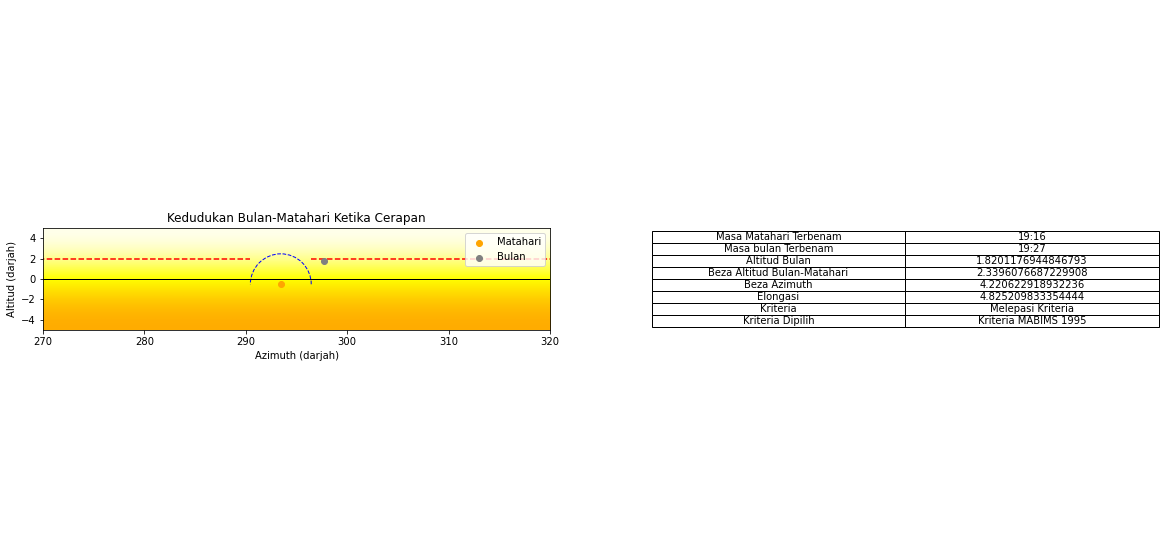

In [28]:
# Create a figure and axes
from matplotlib.patches import Arc

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# Plot the horizon
horizon_angles = np.linspace(0, 360, 720)
horizon_altitudes = np.zeros_like(horizon_angles)
ax1.plot(horizon_angles, horizon_altitudes, color='black', linestyle='-', linewidth=1)


# Plot the Sun and Moon positions
ax1.scatter(sun_az.degrees, sun_alt.degrees, color='orange', label='Matahari', zorder=10)
ax1.scatter(moon_az.degrees, moon_alt.degrees, color='gray', label='Bulan', zorder=10)

ax1.set_xlabel('Azimuth (darjah)')
ax1.set_ylabel('Altitud (darjah)')
ax1.set_title('Kedudukan Bulan-Matahari Ketika Cerapan')
ax1.legend()


ax2.axis('off')  # Turn off the axis for the table
ax2.table(cellText=data, colLabels=None, cellLoc='center', loc='center')


ax1.set_xlim(270, 320)
ax1.set_ylim(-5, 5)
#ax1.set_aspect('equal')


from matplotlib.colors import LinearSegmentedColormap
sky = LinearSegmentedColormap.from_list('sky', ['white', 'yellow', 'orange'])
extent = ax1.get_xlim() + ax1.get_ylim()
ax1.imshow([[0,0], [1,1]], cmap=sky, interpolation='bicubic', extent=extent)

ax1.plot(horizon_angles, horizon_altitudes, color='black', linestyle='-', linewidth=1)

from matplotlib.patches import Arc
circle_radius = kriteria_elongasi

# Sun center coordinates
sun_center_x = sun_az.degrees
sun_center_y = sun_alt.degrees

# Semicircle parameters
radius = kriteria_elongasi
x1 = sun_az.degrees-kriteria_elongasi
x2 = sun_az.degrees+kriteria_elongasi

# Calculate the starting and ending angles of the semicircle
start_angle = 180 - np.degrees(np.arccos((x1 - sun_center_x) / radius))
end_angle = 180 + np.degrees(np.arccos((x2 - sun_center_x) / radius))

# Create the semicircle patch
semicircle_patch = Arc((sun_center_x, sun_center_y), 2 * radius, 2 * radius, theta1=start_angle, theta2=end_angle,
                       fill=False, color='blue', linestyle='--')

# Add the semicircle patch to the plot
ax1.add_patch(semicircle_patch)
# Set the plot limits



# Plot the horizontal line segment
horizontal_line_y = kriteria_altitude
x1 = 0
x2 = sun_az.degrees-kriteria_elongasi
ax1.hlines(y=horizontal_line_y,xmin=x1, xmax=x2,color='red', linestyle='--')

x11 = sun_az.degrees+kriteria_elongasi
x22 = 360
ax1.hlines(y=horizontal_line_y,xmin=x11, xmax=x22,color='red', linestyle='--')
